# Practical 2

# Task 1: The Data

We use the mouse protein expression dataset: https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression
Please use the code provided below for loading the dataset.
Let's start with a bit of exploration.

### Tasks 1.1: Dataset Exploration 
- How many samples / features are provided?
- How many labels does the dataset have?
- What is the value range of the individuals predictors?
- Visualize the 10 first samples of the dataset in a form that highlights their differences.
- Visualize the variance of each predictor.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

file = 'data/Data_Cortex_Nuclear.csv'
df = pd.read_csv(file)

N = 10  # use only every tenth sample
X_all = df.iloc[::N,1:65].to_numpy()
t_all = (df['Behavior'] == 'S/C').to_numpy()[::N]

idx = ~np.any(np.isnan(X_all), axis=1)
X_all = X_all[idx]
t_all = t_all[idx]
print(X_all.shape,t_all.shape)

(105, 64) (105,)


In [2]:
df = df.infer_objects()
from collections import Counter
k=Counter([df[i].dtype for i in df.columns])
labels_counter = Counter([i for i in df['Behavior']])
print(k, labels_counter)
print("No. of labels : ",len(labels_counter))
df.head()

Counter({dtype('float64'): 77, dtype('O'): 5}) Counter({'S/C': 555, 'C/S': 525})
No. of labels :  2


,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [3]:
df = df.infer_objects()
print("Samples: {} \t Features: {}\n\n".format(df.shape[0],df.shape[1]))
print("{}\t\t{}\t\t{}".format("Feature","Range","Variance"))

for i in df.columns:
    if df[i].dtype == 'float64':
        print("{}\t\t{}\t\t{}".format(i,max(df[i])-min(df[i]),df[i].var()))

Samples: 1080 	 Features: 82


Feature		Range		Variance
DYRK1A_N		2.371040873		0.062181388847173245
ITSN1_N		2.35730362		0.06332270486273871
BDNF_N		0.381978457		0.0024386927009413975
NR1_N		2.42681066		0.12061236459564041
NR2A_N		6.745013486		0.870675731581349
pAKT_N		0.47581412599999995		0.001733430768803312
pBRAF_N		0.25302300099999997		0.0007312749423671899
pCAMKII_N		6.120072029		1.6774639505799342
pCREB_N		0.19343544000000001		0.0010619142572528843
pELK_N		5.6843151999999995		0.21799906396342722
pERK_N		3.4175301449999997		0.11923839676784315
pJNK_N		0.441315468		0.002701724579047173
PKCA_N		0.282561332		0.0027286316316900484
pMEK_N		0.401182369		0.0021310749016907556
pNR1_N		0.9080090420000001		0.013916735288313206
pNR2A_N		1.131465436		0.035348946371221185
pNR2B_N		2.422356798		0.07329865720328922
pPKCAB_N		2.493546649		0.23211197666638764
pRSK_N		0.5550202489999999		0.004445177276846436
AKT_N		1.1177535459999999		0.016239413924657508
BRAF_N		1.989522156		0.04682371793393345
CA

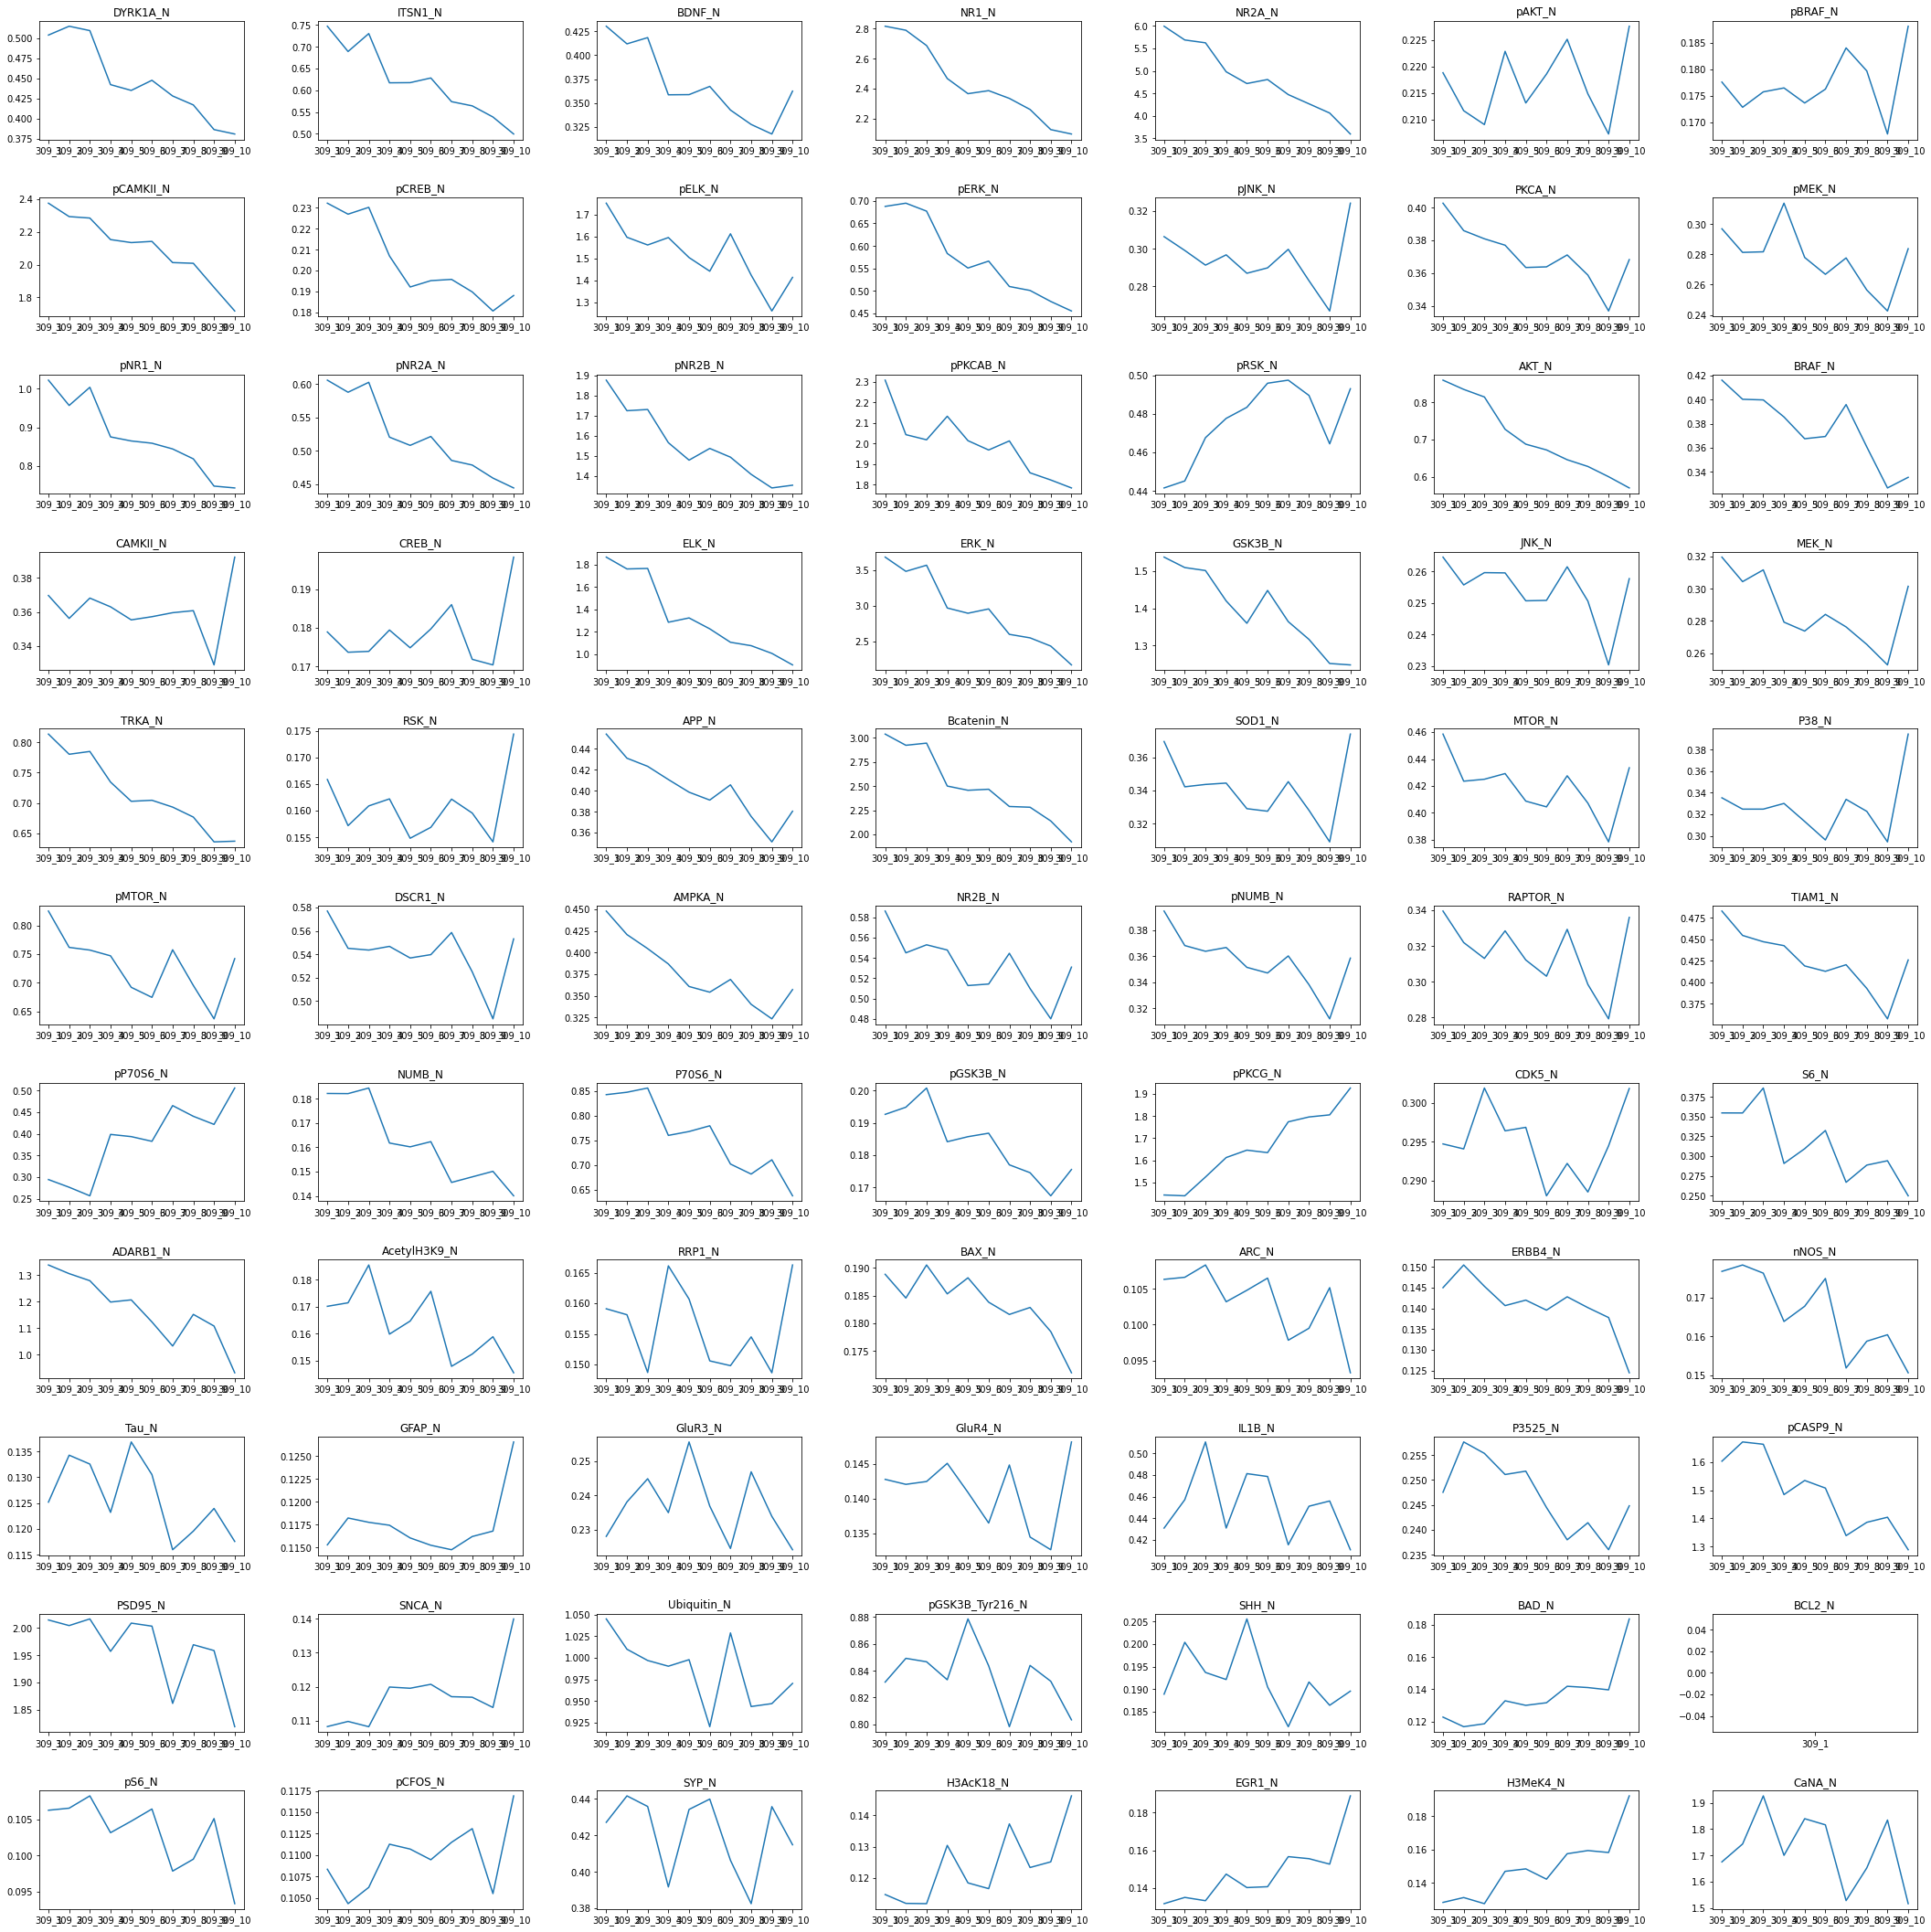

In [4]:
#plotting numerical data
numerical_cols = [i for i in df.columns if df[i].dtype=='float64']
object_cols = [i for i in df.columns if df[i].dtype=='O' and i!='MouseID']
figure, axes = plt.subplots(nrows=11, ncols=7, figsize=(30,30))
r,c=0,0
for i in range(len(numerical_cols)):
    axes[r,c].plot(df['MouseID'][:10], df[numerical_cols[i]][:10])
    axes[r,c].set_title(numerical_cols[i])
    c+=1
    if c==7:
        r+=1
        c=0
figure.tight_layout(pad=3.0)

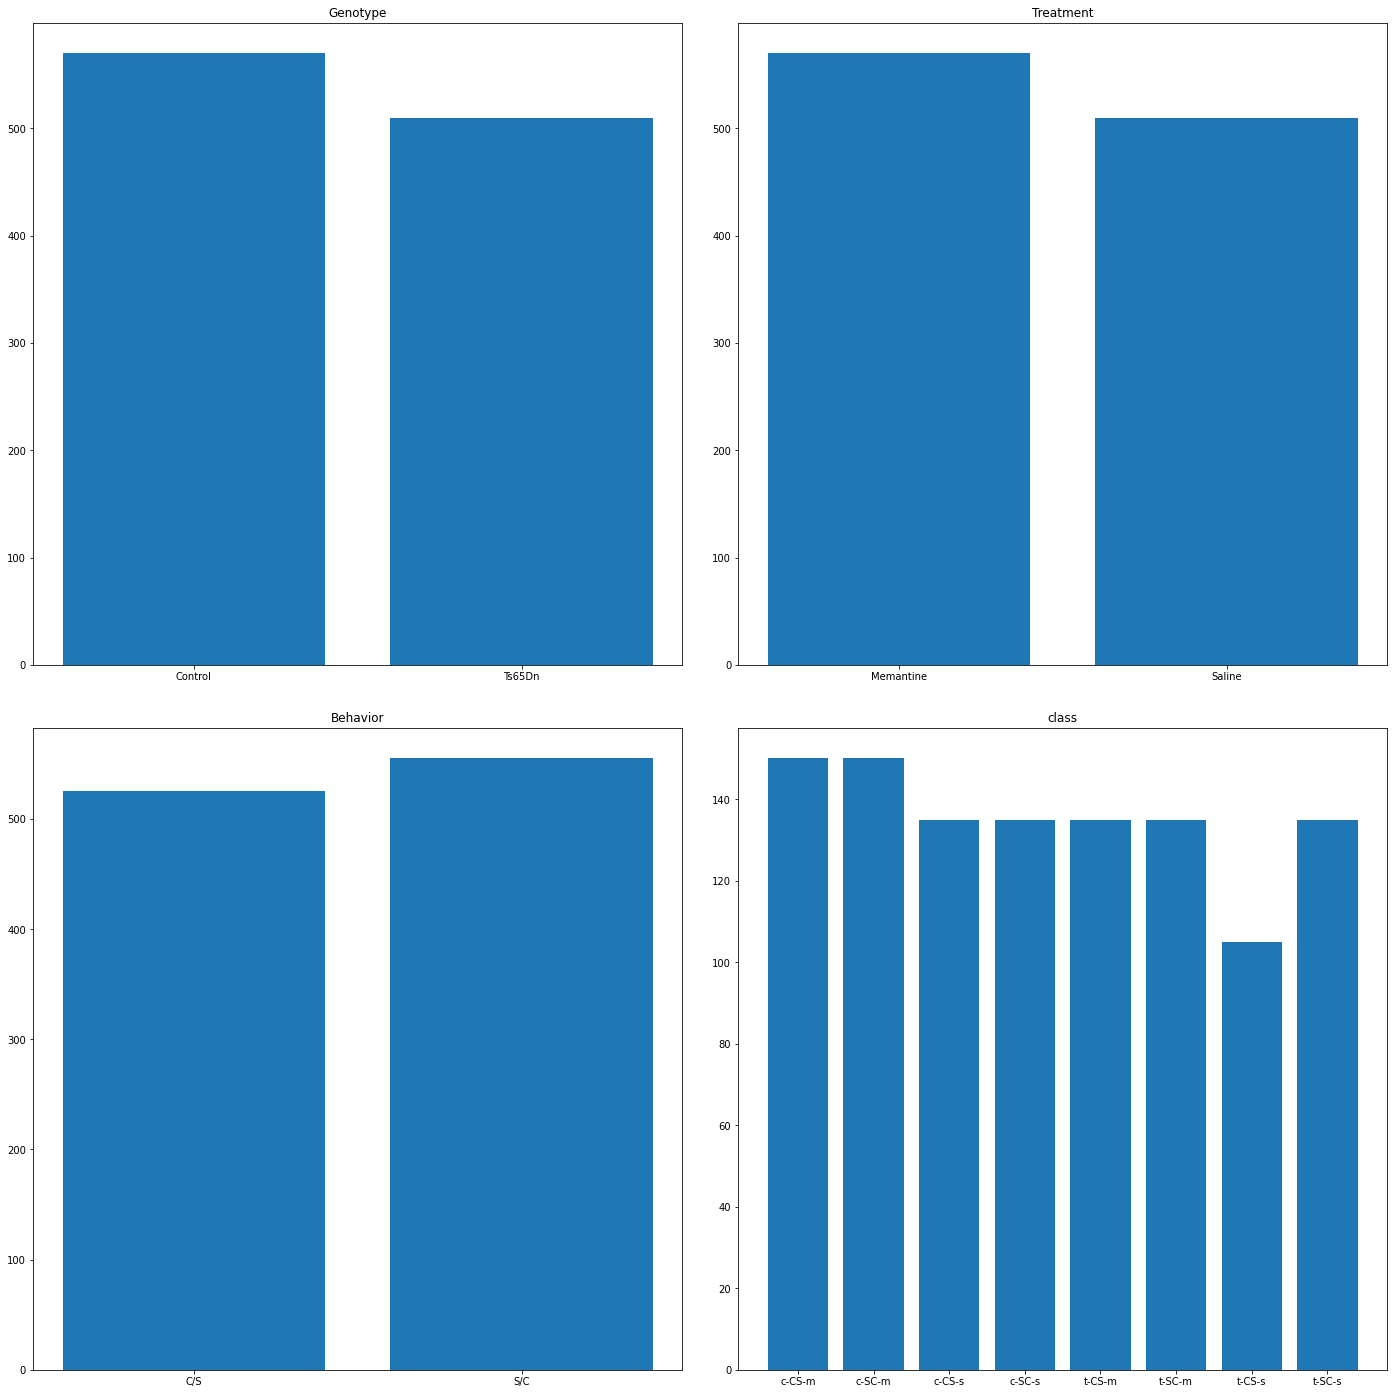

In [5]:
object_cols = [i for i in df.columns if df[i].dtype=='O' and i!='MouseID']
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
r,c=0,0
for i in range(len(object_cols)):
    a=Counter(list(df[object_cols[i]]))
    axes[r,c].bar(a.keys(), a.values())
    axes[r,c].set_title(object_cols[i])
    c+=1
    if c==2:
        r+=1
        c=0
figure.tight_layout(pad=3.0)

**Task 1.2: Data Preprocessing**:  
- Write a function `split_data(X, y, frac, seed)` that first shuffles your training data and then splits it into a training and a test set. `frac` determines the relative size of the test dataset, `seed` makes sure we get reproducible 
results.  
- Write a function `preprocess(X)` which zero-centers your data and sets variance to one (per-feature).

In [6]:
from math import ceil, floor

In [7]:
def split_data(X, y, frac=0.3, seed=None):
    train_size = int((X.shape[0]*(1-frac)))
    test_size = int((X.shape[0]*(frac)))
    if seed is not None:
        np.random.seed(seed)
        idx = np.arange(X.shape[0])
        idx_shuffled = np.random.permutation(idx)
        
        test_idx = idx_shuffled[:test_size]
        train_idx = idx_shuffled[test_size:]
        
        X_test = X[test_idx]
        y_test = y[test_idx]
        
        X_train = X[train_idx]
        y_train = y[train_idx]
        
        return X_train, X_test, y_train, y_test
    ### implement the function here
    
def preprocess(X):
    m=np.mean(X, axis=0)
    d=np.std(X, axis=0)
    feature=(X-m)/d
    return X

# Task 2: LDA

First, use Linear Discriminant Analysis to separate the classes. As discussed in the Bishop in pg. 186-189, we can find a weight vector $\vec{w}$ that performs a projection of the i-th input data point $\vec{x}_i$

$p =   \vec{w}^T \vec{x}_i$

that optimally separates the classes.

Use the analytic solution to compute the optimal weights $\vec{w}$ from the training set data. 

** Task 2.1 ***

1. Implement a function `compute_lda_weights(x, y)` manually, which carries out LDA using the data `x,y`. 
2. Apply this function on your training data.
3. Visualize the obtained weight vector $\vec{w}$ using a `plt.stemplot`.

In [8]:
def sub_mean(X):
    xm=[]
    for i in range(X.shape[1]):
        xm.append(sum(X[:,i])/X.shape[0])
    xm=np.array(xm)
    for i in range (xm.shape[0]):
        X[:,i] = X[:,i] - xm[i]
    return X,xm

In [9]:
def scatter_matrix(X):
    s=np.zeros((X.shape[1], X.shape[1]), float)
    for i in X:#range(X.shape[0]):
        i= np.reshape(i, (-1, 1))
        i=i.dot(i.transpose())
        s = np.add(s,i)
    return s

In [10]:
def compute_lda_weights(X_all, t_all):
    X_1 = np.array([X_all[i] for i in range(t_all.shape[0]) if t_all[i] !=False])
    X_0 = np.array([X_all[i] for i in range(t_all.shape[0]) if t_all[i] ==False])
    X_1,m1=sub_mean(X_1)
    X_0,m0 = sub_mean(X_0)
    m0 = np.reshape(m0, (-1, 1))
    m1 = np.reshape(m1, (-1, 1))
    sw = np.add(scatter_matrix(X_0),scatter_matrix(X_1)) #Scatter matrix within class
    
    Sb = (m1-m0).dot((m1-m0).transpose()) # Scatter matrix between different classes
    m=np.linalg.inv(sw).dot(Sb)
    w,v = np.linalg.eig(m)
    w=[]
    for i in v:
        w.append([max(i)])
    w=np.array(w)
    print(w.shape)
    return m0, m1, m1-m0, w

In [11]:
X, X_test, t, t_test = split_data(X_all, t_all, seed=1)
print(X.shape, X_test.shape,t.shape,t_test.shape)
w_lda = np.random.uniform(-1, 1, 50)
print(w_lda.shape, np.transpose(w_lda).shape)

(74, 64) (31, 64) (74,) (31,)
(50,) (50,)


(64, 1)


c:\users\hemant-rana\appdata\local\programs\python\python39\lib\site-packages\numpy\ma\core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
c:\users\hemant-rana\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\hemant-rana\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'predictors')

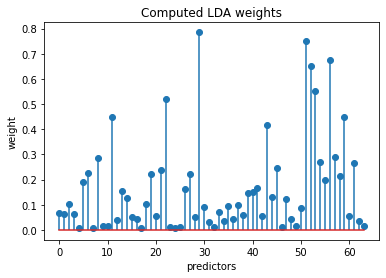

In [12]:
X, X_test, t, t_test = split_data(X_all, t_all, seed=1)
m0, m1, mdiff, w_lda = compute_lda_weights(X, t)

# w_lda = np.random.uniform(-1, 1, 50)*  # example data
plt.stem(w_lda.flatten(), use_line_collection=True)
plt.title('Computed LDA weights')
plt.ylabel('weight')
plt.xlabel('predictors')

### Task 2.3

Project the training data and the test data on $\vec{w}$. Visualize the class separation using a two-color histogram. 
- Is the class separation good? No
- Is there a big difference between training and test data? Yes


In [13]:
print(X.shape, X_test.shape,w_lda.shape)
a=np.array([w_lda.transpose().dot(X[i]) for i in range (X.shape[0])])
b=np.array([w_lda.transpose().dot(X_test[i]) for i in range(X_test.shape[0])])

(74, 64) (31, 64) (64, 1)


c:\users\hemant-rana\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\histograms.py:851: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)


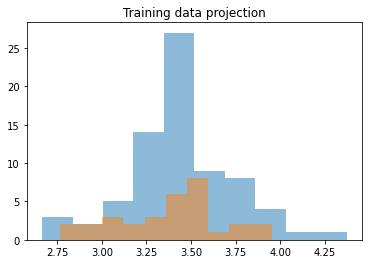

In [14]:
# a, b = np.random.normal(2, 1, 20), np.random.normal(0, 1, 20)  # example data
plt.title('Training data projection')
_ = plt.hist(a,label='class 0',alpha=0.5)
_ = plt.hist(b,label='class 1',alpha=0.5)

### Task 2.4 

Now we make class predictions based on the projections. Read https://en.wikipedia.org/wiki/Linear_discriminant_analysis#Fisher's_linear_discriminant and compute threshold $c$ for the projected values $p$ based on the training data. Print the value of $c$ and plot $c$ into the histograms of projected values you made before!

Use $c$ to assign class labels for training and test set. Determine the classification errors (in terms of accuracy) on both datasets and print them. 

In [15]:
# print(a.shape,b.shape,m0.shape)
sum_of_means = (m0+m1)/2
c=w_lda.transpose().dot(sum_of_means)
print(c) 

[[3.44991453+0.62182084j]]


In [16]:
print(X.shape,t.shape,X_all.shape,t_all.shape)

(74, 64) (74,) (105, 64) (105,)


In [17]:
# X_1 = np.array([X[i] for i in range(t.shape[0]) if t[i] !=False])
# X_0 = np.array([X[i] for i in range(t.shape[0]) if t[i] ==False])
# print(X_1.shape,X_0.shape)
# k1 = X_1.mean(0)
# k1= np.reshape(k1, (-1, 1))

# k0 = X_0.mean(0)
# k0= np.reshape(k0, (-1, 1))

# # Xcov = np.cov(X.T)
# X0cov = np.cov(X_0.T)
# X1cov = np.cov(X_1.T)
# # c = k1.transpose().dot(Xcov).dot(k1) - k0.transpose().dot(Xcov).dot(k0)
# c = 0.5*(k1.transpose().dot(np.linalg.inv(X1cov)).dot(k1) - k0.transpose().dot(np.linalg.inv(X0cov)).dot(k0))
# print(c.shape,c)


In [18]:
print(w_lda.shape, X_test.shape,t_test.shape)
projections = X_test.dot(w_lda) 
print(projections)
# print(t_test)

(64, 1) (31, 64) (31,)
[[3.58675471+0.66427298j]
 [3.57376966+0.61090947j]
 [3.44197627+0.62640052j]
 [3.57957224+0.62385871j]
 [3.00001057+0.54482712j]
 [3.38817365+0.62305013j]
 [3.36367364+0.59687747j]
 [3.31109842+0.56343482j]
 [3.51147723+0.65332639j]
 [3.52935892+0.63183902j]
 [3.95295326+0.75277872j]
 [3.41955516+0.61266731j]
 [3.29065671+0.57271802j]
 [3.23822671+0.56935555j]
 [3.0466382 +0.55948763j]
 [3.4511884 +0.61276172j]
 [3.60432645+0.60911586j]
 [3.71618949+0.69369218j]
 [3.47792935+0.61008568j]
 [3.87290228+0.65990835j]
 [3.14606468+0.57198177j]
 [3.55968404+0.60357632j]
 [3.47150194+0.60979818j]
 [3.31577314+0.51198343j]
 [2.96302644+0.51904718j]
 [3.06590699+0.56016613j]
 [3.51332126+0.5979518j ]
 [2.76468706+0.48407231j]
 [3.1161374 +0.53376184j]
 [3.73817035+0.715305j  ]
 [2.78607453+0.50715259j]]


In [19]:
a=np.array([i for i in projections if i<c])
b=np.array([i for i in projections if i>=c])
print(a,b)

[[3.44197627+0.62640052j]
 [3.00001057+0.54482712j]
 [3.38817365+0.62305013j]
 [3.36367364+0.59687747j]
 [3.31109842+0.56343482j]
 [3.41955516+0.61266731j]
 [3.29065671+0.57271802j]
 [3.23822671+0.56935555j]
 [3.0466382 +0.55948763j]
 [3.14606468+0.57198177j]
 [3.31577314+0.51198343j]
 [2.96302644+0.51904718j]
 [3.06590699+0.56016613j]
 [2.76468706+0.48407231j]
 [3.1161374 +0.53376184j]
 [2.78607453+0.50715259j]] [[3.58675471+0.66427298j]
 [3.57376966+0.61090947j]
 [3.57957224+0.62385871j]
 [3.51147723+0.65332639j]
 [3.52935892+0.63183902j]
 [3.95295326+0.75277872j]
 [3.4511884 +0.61276172j]
 [3.60432645+0.60911586j]
 [3.71618949+0.69369218j]
 [3.47792935+0.61008568j]
 [3.87290228+0.65990835j]
 [3.55968404+0.60357632j]
 [3.47150194+0.60979818j]
 [3.51332126+0.5979518j ]
 [3.73817035+0.715305j  ]]


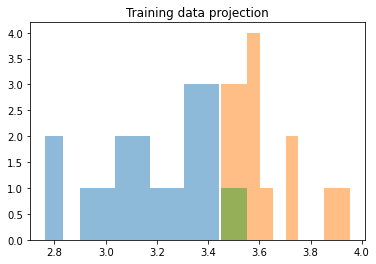

In [20]:
plt.title('Training data projection')
_ = plt.hist(a,label='class 0',alpha=0.5)
_ = plt.hist(b,label='class 1',alpha=0.5)
_ = plt.hist(c,label='class 2',alpha=0.5)

## Task 3: Logistic Regression

Next, we will consider classification using Logistic Regression. 

For this task, we will use a different dataset:  
It consists of activations from a convolutional neural network (ResNet18) for images of cats and dogs.
The dataset contains 2,000 samples (i.e. CNN activations) and 256 features (i.e. the CNN activations have 256 dimensions). A target value of 0 indicates a cat, 1 a dog.

Below, you find all imports that are necessary.


In [21]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import pickle

Xall, t_all = pickle.load(open('data/cnn_features.pickle', 'rb'))

**Task 3.0: Normalize the data**

Make sure the data has has zero mean and variance 1 per feature.

In [22]:
X_norm = preprocess(Xall)
X, X_test, t, t_test = split_data(X_norm, t_all, seed=1)

**Task 3.1: Iterative Reweighted Least Squares**

1. Implement the IRLS algorithm and output at each iteration the current training accuracy. Remember the weight are updated according to:
$$ w' = w - ( \Phi^T R \Phi ) ^ {-1} \Phi^T (y - t)$$
Where $y$ is the prediction, $t$ the ground truth target, $R$ the weighting matrix and $\Phi$ the design matrix.  
Hints:  
(a) There is a bias term in logistic regression  
(b) Use a small value for weight init to avoid numerical problems.

2. Apply the IRLS algorithm on data and compute the test accuracy.
3. Compare the results of your implementation to the sklearn implementation of `LogisticRegression(penalty='none')`. Do you get the same result?

IRLS Approach 1

In [23]:
from scipy.special import expit, logit
def sigmoid(X):
    return 1./(1.+np.exp(-X))

def y(X, w):
    return sigmoid(X.dot(w))
def R(y):
    R = np.identity(y.size)
    R = R*((y*(1-y)))
    return R
def irls(X, t):
    #There is a bias term in logistic regression
    bias = np.ones(shape=(len(X),1))
    X= np.append(bias, X, axis=1)
    #set w_init
    w = np.ones(X.shape[1])
    w = w.reshape(w.size, 1)*0.01

    t = np.array(list(map(lambda x: 1 if x else 0, t)))
    t = t.reshape(t.size, 1)
    #after some iterations matrix is singular
    for i in range(30):
        y_ = y(X,w)
        w = w - np.linalg.inv(X.T.dot(R(y_)).dot(X)).dot((X.T).dot(y_-t))
    return y_
 # result=1
 # for i in y_:
 # if i>= 0.5:
 # result=result+1
 # print(result)
 # print(result/y_.shape[0])
 # return y_,y_.shape


In [24]:
y_=irls(X_norm,t_all)
result=1
for i in y_:
    if i>= 0.5:
        result=result+1
print(result)
print(result/y_.shape[0])

1006
0.503


IRLS Approach 2

In [25]:
from numpy import array, diag, dot, maximum, empty, repeat, ones, sum
from numpy.linalg import inv
def IRLS(y, X, maxiter, w_init = 0.01, d = 0.01, tolerance = 0.001):
    n,p = X.shape
    delta = array( repeat(d, n) ).reshape(1,n)
    print(delta)
    w = repeat(1, n)
    W = diag( w )
    B = dot( inv( X.T.dot(W).dot(X) ),( X.T.dot(W).dot(y) ) )
    for _ in range(maxiter):
        _B = B
        _w = abs(y - X.dot(B)).T
        w = float(1)/maximum( delta, _w )
        W = diag( w[0] )
        B = dot( inv( X.T.dot(W).dot(X) ), ( X.T.dot(W).dot(y) ) )
        #print(B)
        tol = sum( abs( B - _B ) )
        print("Tolerance = %s" % tol)
        if tol < tolerance:
            return B
    return B

In [26]:
B = IRLS(y=t_all,X=X_norm, maxiter=30)
print(B.T.shape)
#abs_error = abs( y_new - X_new.dot(B) )
y_predc=sigmoid(X_norm.dot(B))
print(y_predc.shape)
result=0
for i in y_predc:
    if i>= 0.5:
        result=result+1
print(result)
print(result/y_predc.shape[0])


[[0.01 0.01 0.01 ... 0.01 0.01 0.01]]
Tolerance = 1.4970320927326979
Tolerance = 0.9496805468454954
Tolerance = 0.6754311179847414
Tolerance = 0.534619859656476
Tolerance = 0.44002140772731213
Tolerance = 0.366024841415188
Tolerance = 0.30634902416209914
Tolerance = 0.256236274437886
Tolerance = 0.21517509387685604
Tolerance = 0.1821247328855226
Tolerance = 0.15699638293101986
Tolerance = 0.13721881341754955
Tolerance = 0.11991240759791294
Tolerance = 0.10648393193596845
Tolerance = 0.09616524629672529
Tolerance = 0.08675999794105355
Tolerance = 0.07876037047243051
Tolerance = 0.07221334754325448
Tolerance = 0.0658822093778828
Tolerance = 0.05991990788680285
Tolerance = 0.05492478778491744
Tolerance = 0.05034118975210311
Tolerance = 0.04657639598401955
Tolerance = 0.042634719472523536
Tolerance = 0.038674539909882344
Tolerance = 0.03503449620969125
Tolerance = 0.03233503864037278
Tolerance = 0.03006111692057349
Tolerance = 0.02808337863217801
Tolerance = 0.026343899352455763
(256,)
(20

**Task 3.2: Logistic Regression with Regularization**

1. Set sklearn's penalty parameter to `l1` and `l2`. Use the range `np.linspace(0.02, 1, 25)` for the parameter `C`, which controls the strength of regularization. Where is the regularization strongest, for small or big `C`?   
Hint: For `l1` regularization you can use the `saga` solver.
2. Plot strength of regularization over accuracy. Does regularization improve the scores?
3. Visualize the coefficients (or just a subset of all coefficient for a better overview) of the regularized settings and the unregularized setting. What do you observe?
3. Compare the coefficients to the LDA weights.

In [27]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

In [28]:
c = np.linspace(0.02, 1, 25)
scores = {'l1':[], 'l2':[]}
cL1 = []
for i in c:
    logreg = LogisticRegression(penalty='l1', solver='saga', C=i,max_iter=1000).fit(X, t)
    sc = logreg.score(X_test, t_test)
    scores['l1'].append(sc)
    cL1.append(logreg.coef_)

In [29]:
print(np.array(cL1).shape,X_test.shape)

(25, 1, 256) (600, 256)


In [30]:
#for l2 penalty
cL2 = []
for i in c:
    logreg = LogisticRegression(penalty='l2', solver='lbfgs', C=i,fit_intercept=False,max_iter=1000).fit(X, t)
    sc = logreg.score(X_test, t_test)
    scores['l2'].append(sc)
    cL2.append(logreg.coef_)

In [31]:
# plt.plot(c,scores['l1'])
# plt.xlabel('Regularization Parameter')
# plt.ylabel('Regularization Score')
# plt.title('Reguarization Parameter v/s Accuracy Score')
# plt.show()

In [32]:
logreg = LogisticRegression(max_iter=1000).fit(X, t)
score_noreg = logreg.score(X_test, t_test)
cnp = logreg.coef_

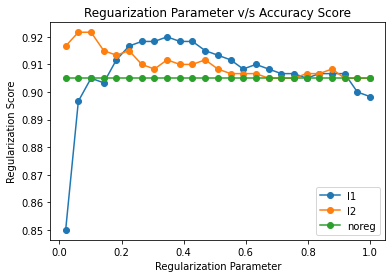

In [33]:
regplot = [None, None, None]
l1_plot, = plt.plot(np.linspace(0.02, 1, 25), scores['l1'], '-o')
l1_plot.set_label('l1')
l2_plot, = plt.plot(np.linspace(0.02, 1, 25), scores['l2'], '-o')
l2_plot.set_label('l2')
noreg_plot, = plt.plot(np.linspace(0.02, 1, 25), [score_noreg]*25, '-o')
noreg_plot.set_label('noreg')
plt.xlabel('Regularization Parameter')
plt.ylabel('Regularization Score')
plt.title('Reguarization Parameter v/s Accuracy Score')
plt.legend()
plt.show()

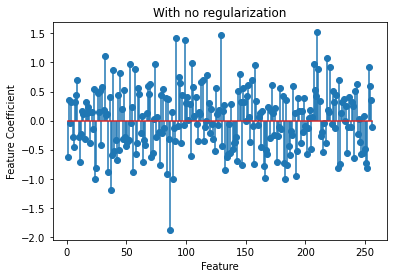

In [34]:
cnp = np.reshape(cnp, (-1, 1))
plt.stem([i for i in range(1,257)],cnp, '-o')
plt.xlabel('Feature')
plt.ylabel('Feature Coefficient')
plt.title('With no regularization')
plt.show()

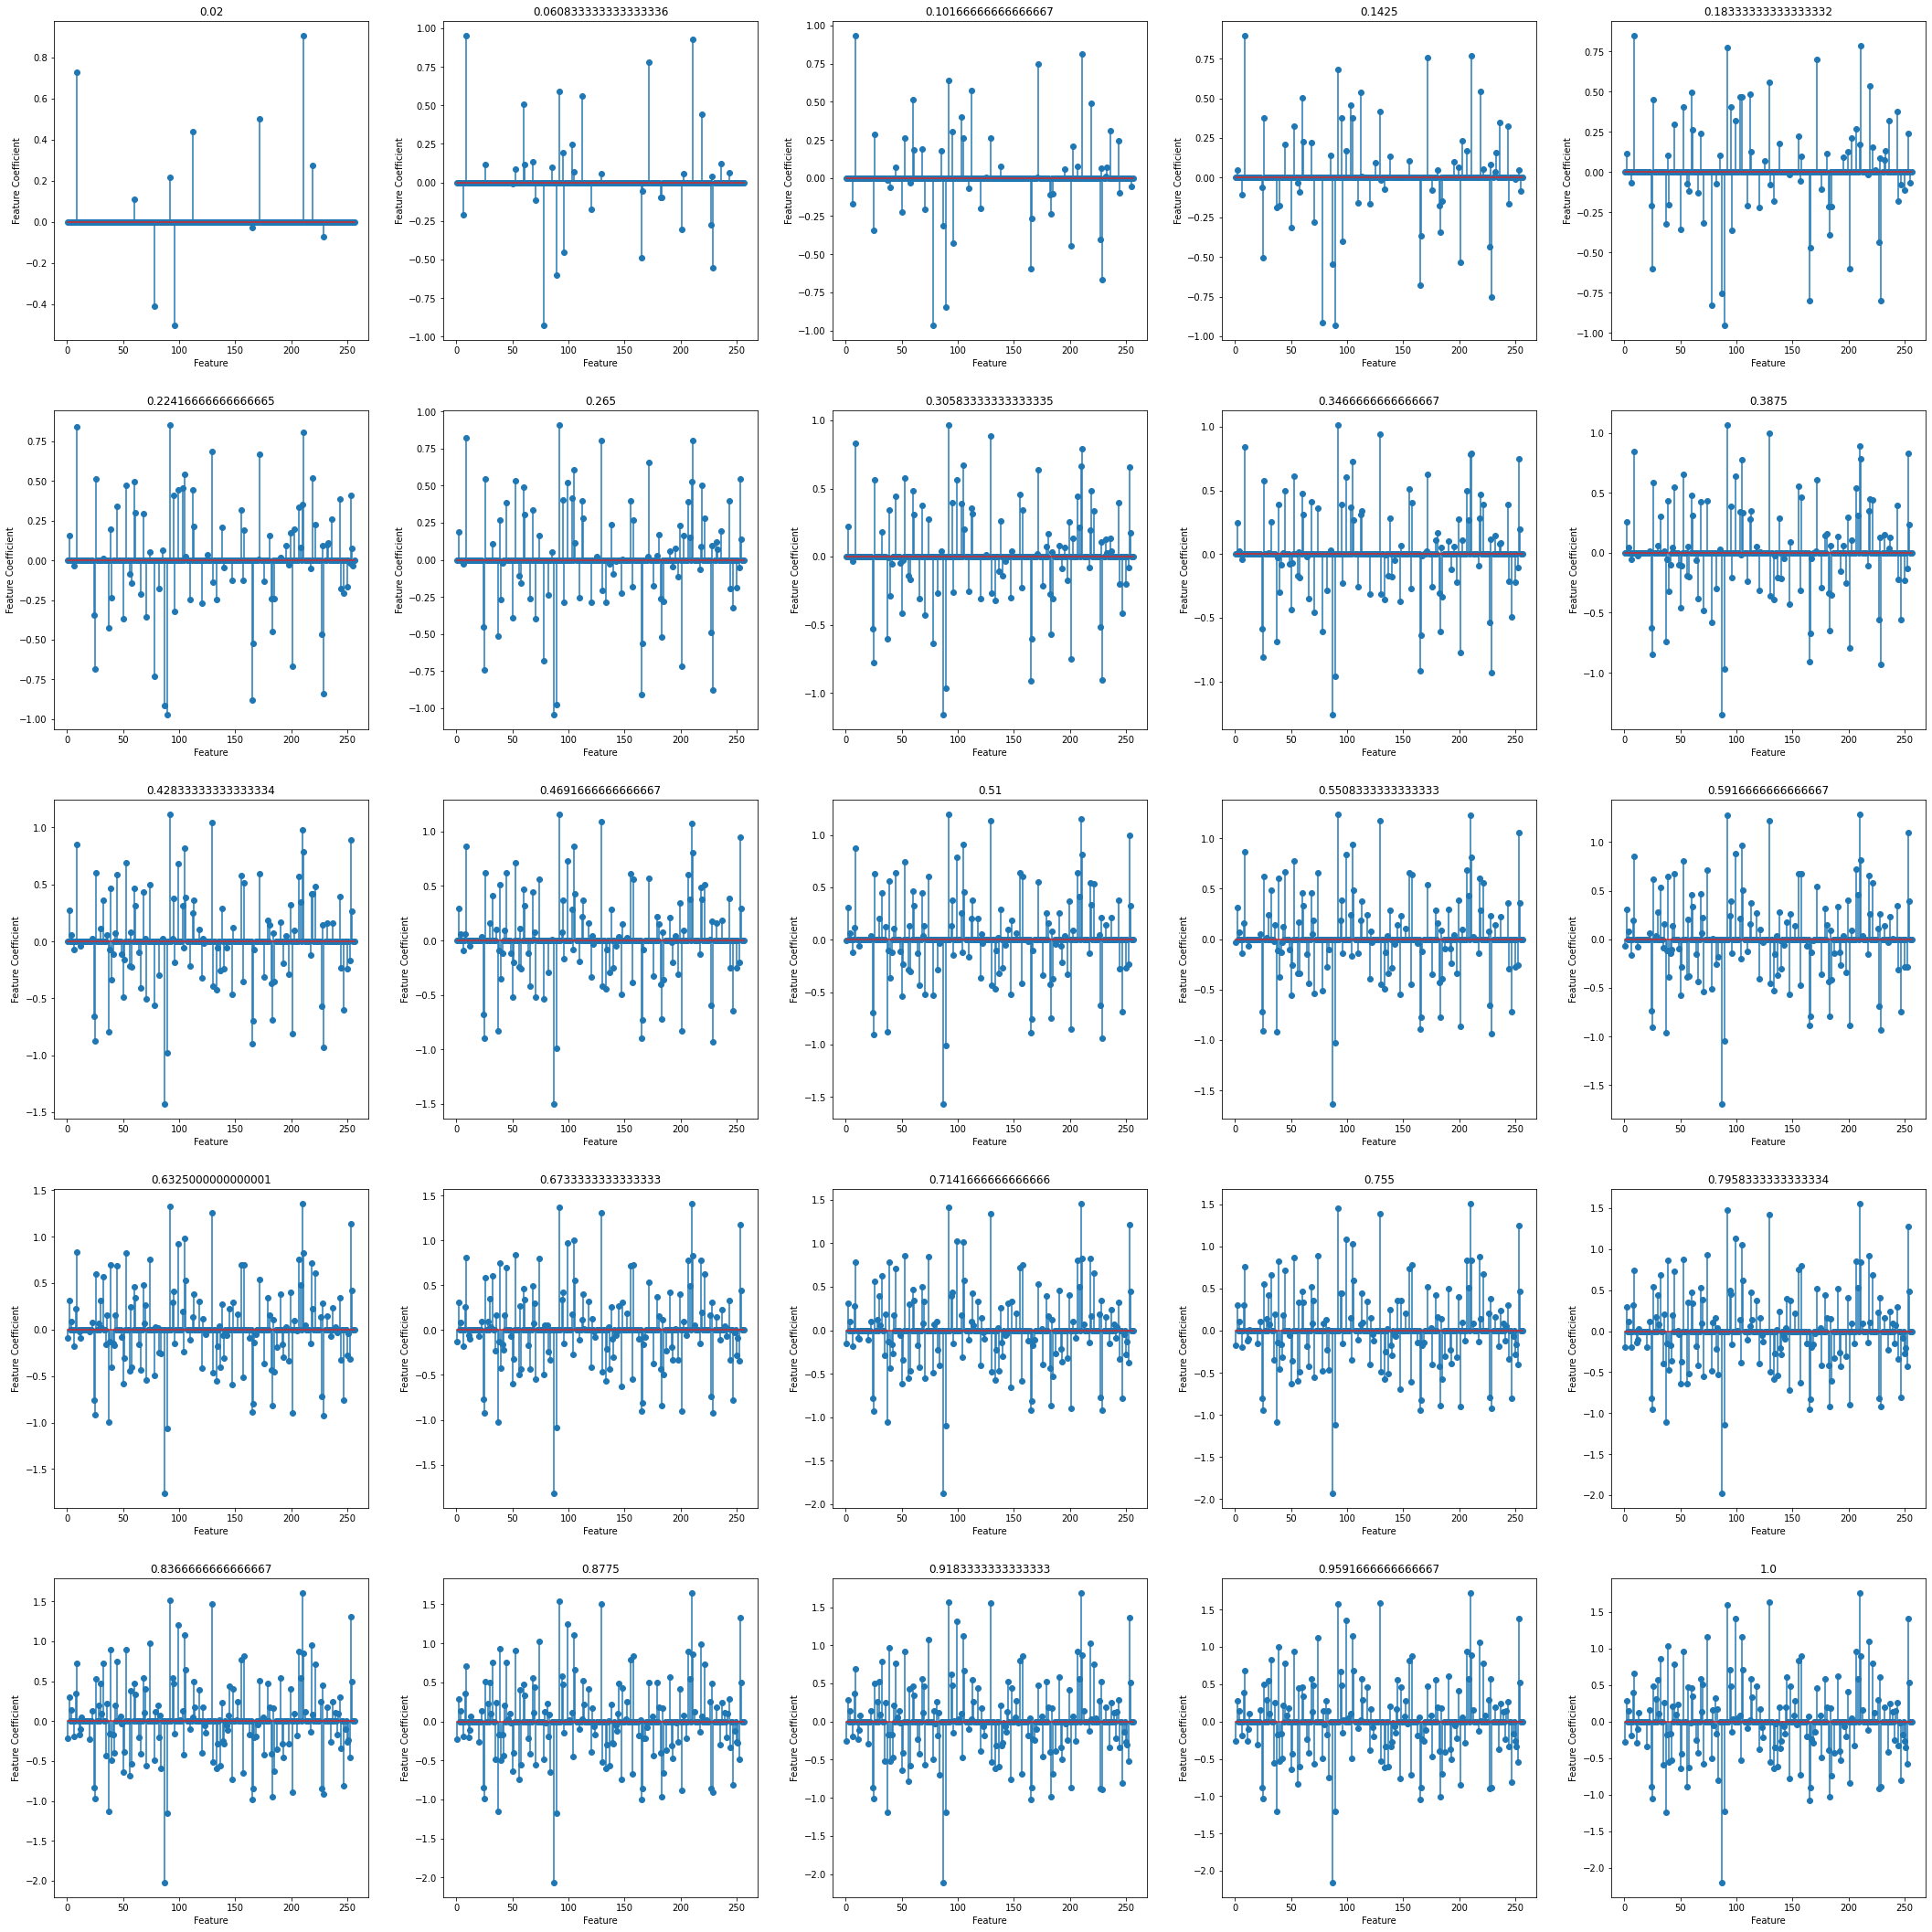

In [35]:
##### For L1 regularization
figure, axes = plt.subplots(nrows=5, ncols=5, figsize=(30,30))
r,col=0,0
for i in range(25):
    feat = np.reshape(cL1[i],(-1, 1))
    axes[r,col].stem([i for i in range(1,257)],feat)
    axes[r,col].set_title(c[i])
    axes[r,col].set_xlabel('Feature')
    axes[r,col].set_ylabel('Feature Coefficient')
    col+=1
    if col==5:
        r+=1
        col=0
figure.tight_layout(pad=3.0)

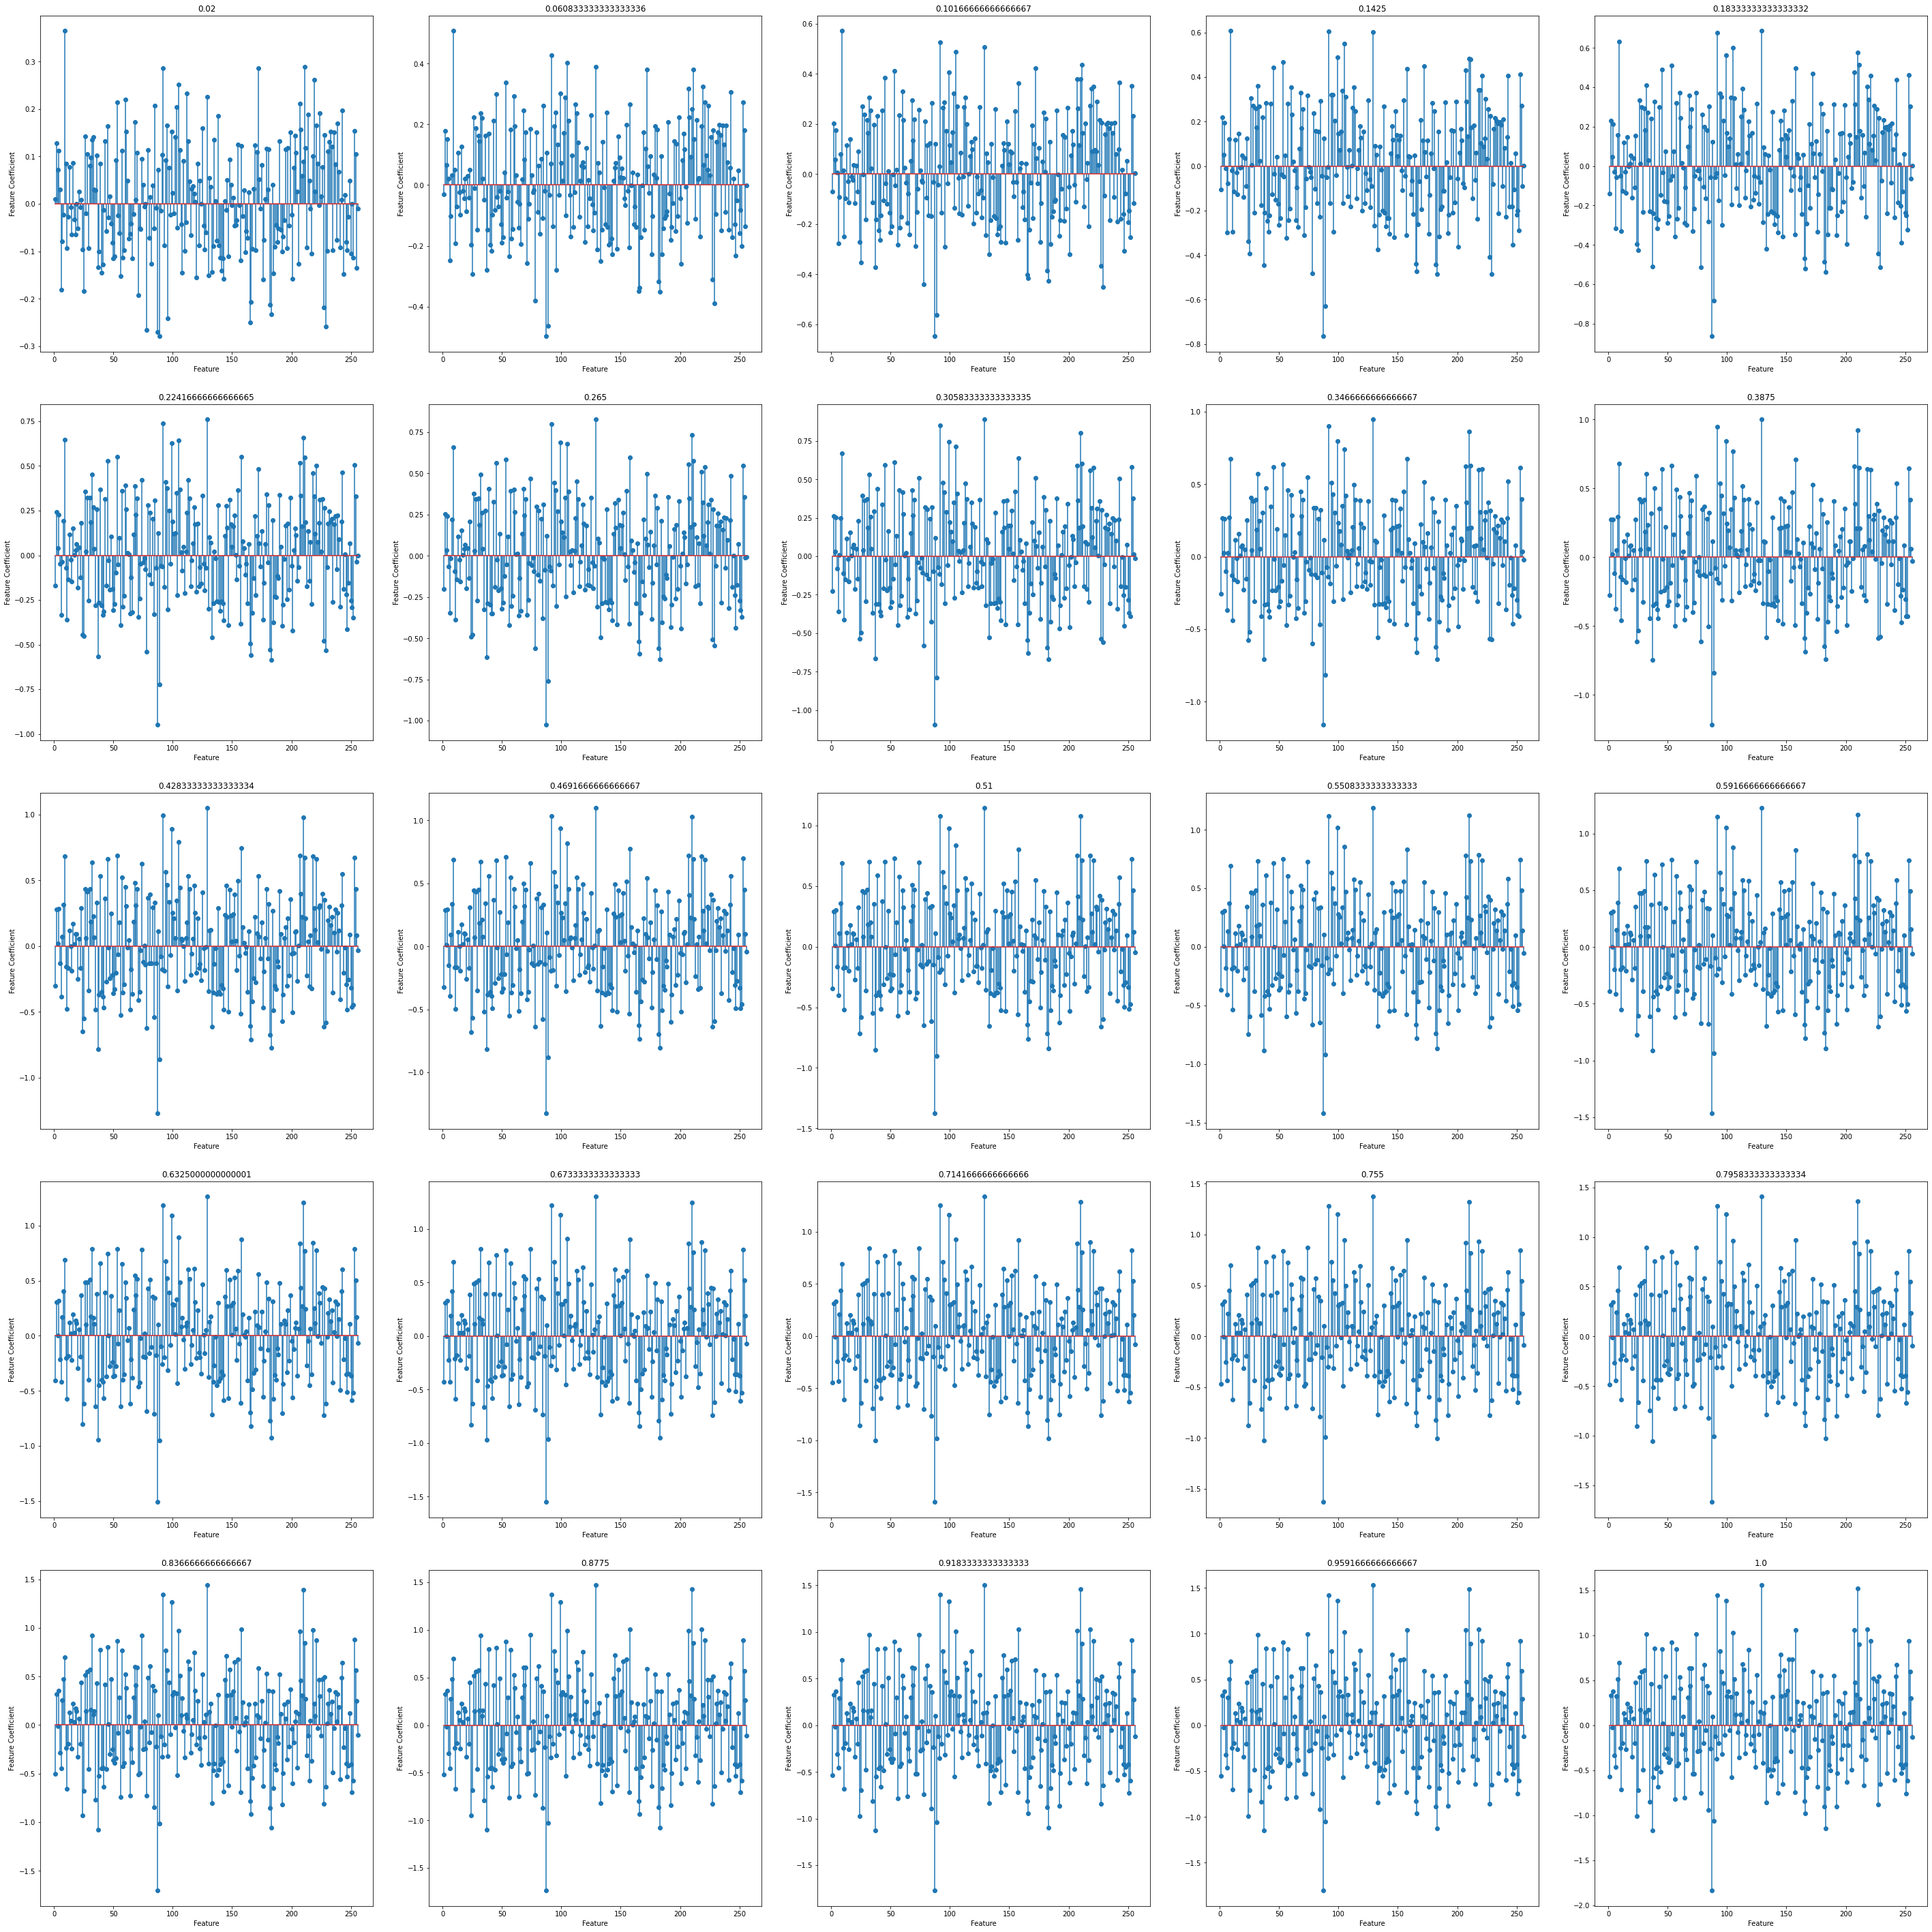

In [36]:
##### For L2 regularization
figure, axes = plt.subplots(nrows=5, ncols=5, figsize=(40,40))
r,col=0,0
for i in range(25):
    feat = np.reshape(cL2[i],(-1, 1))
    axes[r,col].stem([i for i in range(1,257)],feat)
    axes[r,col].set_title(c[i])
    axes[r,col].set_xlabel('Feature')
    axes[r,col].set_ylabel('Feature Coefficient')
    col+=1
    if col==5:
        r+=1
        col=0
figure.tight_layout(pad=3.0)